In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | port blair
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | dinsor
City not found. Skipping...
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | tazovskiy
Processing Record 16 of Set 1 | jiaxing
Processing Record 17 of Set 1 | havoysund
Processing Record 18 of Set 1 | clyde river
Processing Record 19 of Set 1 | port lincoln
Processing Record 20 of Set 1 | bandar-e lengeh
Processing Record 21 of Set 1 | mackay
Processing Record 22 of Set 1 | punta arenas
Processing Rec

Processing Record 36 of Set 4 | pozo colorado
Processing Record 37 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 38 of Set 4 | rakhiv
Processing Record 39 of Set 4 | haverfordwest
Processing Record 40 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 41 of Set 4 | te anau
Processing Record 42 of Set 4 | dwarka
Processing Record 43 of Set 4 | verkhoyansk
Processing Record 44 of Set 4 | nizhniy kuranakh
Processing Record 45 of Set 4 | derzhavinsk
Processing Record 46 of Set 4 | kollegal
Processing Record 47 of Set 4 | kavaratti
Processing Record 48 of Set 4 | sedelnikovo
City not found. Skipping...
Processing Record 49 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 50 of Set 4 | labuhan
Processing Record 1 of Set 5 | goure
Processing Record 2 of Set 5 | saleaula
City not found. Skipping...
Processing Record 3 of Set 5 | kinablangan
Processing Record 4 of Set 5 | bosaso
Processing Record 5 of Set 5 | hualmay
Processing Reco

Processing Record 28 of Set 8 | nouakchott
Processing Record 29 of Set 8 | san antonio
Processing Record 30 of Set 8 | tarn taran
Processing Record 31 of Set 8 | yulara
Processing Record 32 of Set 8 | miraflores
Processing Record 33 of Set 8 | bethel
Processing Record 34 of Set 8 | lokosovo
Processing Record 35 of Set 8 | constitucion
Processing Record 36 of Set 8 | sherbrooke
Processing Record 37 of Set 8 | itaituba
Processing Record 38 of Set 8 | acari
Processing Record 39 of Set 8 | auki
Processing Record 40 of Set 8 | pangody
Processing Record 41 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 8 | ilulissat
Processing Record 43 of Set 8 | shulan
Processing Record 44 of Set 8 | sao filipe
Processing Record 45 of Set 8 | dzhebariki-khaya
Processing Record 46 of Set 8 | tamandare
Processing Record 47 of Set 8 | broken hill
Processing Record 48 of Set 8 | ayer itam
City not found. Skipping...
Processing Record 49 of Set 8 | port augusta
Processing Record 50

Processing Record 14 of Set 12 | dawlatabad
Processing Record 15 of Set 12 | tortoli
Processing Record 16 of Set 12 | bonavista
Processing Record 17 of Set 12 | yanchukan
City not found. Skipping...
Processing Record 18 of Set 12 | batagay
Processing Record 19 of Set 12 | groa
Processing Record 20 of Set 12 | krasnovishersk
Processing Record 21 of Set 12 | kaeo
Processing Record 22 of Set 12 | warqla
City not found. Skipping...
Processing Record 23 of Set 12 | zhigansk
Processing Record 24 of Set 12 | fortuna
Processing Record 25 of Set 12 | vanimo
Processing Record 26 of Set 12 | honiara
Processing Record 27 of Set 12 | contamana
Processing Record 28 of Set 12 | moen
Processing Record 29 of Set 12 | sondrio
Processing Record 30 of Set 12 | shieli
Processing Record 31 of Set 12 | grand baie
Processing Record 32 of Set 12 | tubruq
City not found. Skipping...
Processing Record 33 of Set 12 | candolim
Processing Record 34 of Set 12 | riyadh
Processing Record 35 of Set 12 | tanete
Processi

In [39]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,62.76,77,75,5.75,CA,2022-07-12 01:41:28
1,Dikson,73.5069,80.5464,37.60,93,100,6.71,RU,2022-07-12 01:41:29
2,Torbay,47.6666,-52.7314,60.53,65,75,16.11,CA,2022-07-12 01:41:29
3,Rikitea,-23.1203,-134.9692,74.71,73,0,12.24,PF,2022-07-12 01:41:29
4,Bengkulu,-3.8004,102.2655,79.95,76,41,2.13,ID,2022-07-12 01:38:05
5,Barrow,71.2906,-156.7887,37.42,87,100,11.50,US,2022-07-12 01:39:11
6,Port Blair,11.6667,92.7500,84.24,79,100,12.66,IN,2022-07-12 01:41:30
7,Atuona,-9.8000,-139.0333,77.43,75,18,16.67,PF,2022-07-12 01:40:20
8,Bluff,-46.6000,168.3333,45.81,79,100,23.13,NZ,2022-07-12 01:41:31
9,Hermanus,-34.4187,19.2345,54.81,79,0,6.71,ZA,2022-07-12 01:41:31


In [40]:
#reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-07-12 01:41:28,55.7435,-97.8558,62.76,77,75,5.75
1,Dikson,RU,2022-07-12 01:41:29,73.5069,80.5464,37.60,93,100,6.71
2,Torbay,CA,2022-07-12 01:41:29,47.6666,-52.7314,60.53,65,75,16.11
3,Rikitea,PF,2022-07-12 01:41:29,-23.1203,-134.9692,74.71,73,0,12.24
4,Bengkulu,ID,2022-07-12 01:38:05,-3.8004,102.2655,79.95,76,41,2.13
5,Barrow,US,2022-07-12 01:39:11,71.2906,-156.7887,37.42,87,100,11.50
6,Port Blair,IN,2022-07-12 01:41:30,11.6667,92.7500,84.24,79,100,12.66
7,Atuona,PF,2022-07-12 01:40:20,-9.8000,-139.0333,77.43,75,18,16.67
8,Bluff,NZ,2022-07-12 01:41:31,-46.6000,168.3333,45.81,79,100,23.13
9,Hermanus,ZA,2022-07-12 01:41:31,-34.4187,19.2345,54.81,79,0,6.71


In [41]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [42]:
#Extract relevant fields from the dataframe for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [43]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1657591865.266203

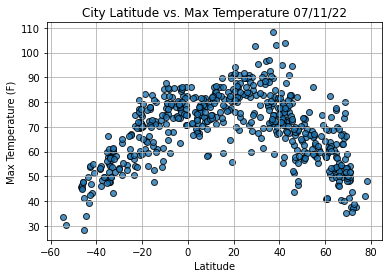

In [44]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

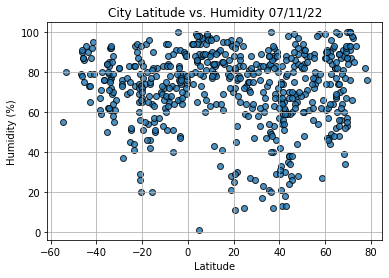

In [45]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

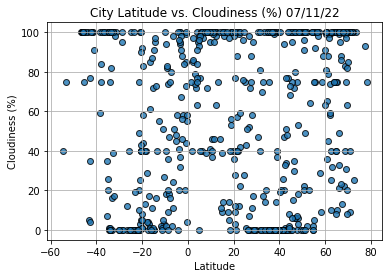

In [46]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

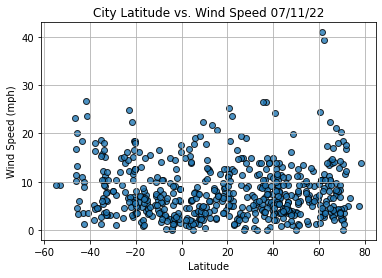

In [47]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [48]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [49]:
index13 = city_data_df.loc[13]
index13

City                    Tazovskiy
Country                        RU
Date          2022-07-12 01:41:33
Lat                       67.4667
Lng                          78.7
Max Temp                    49.82
Humidity                       64
Cloudiness                     13
Wind Speed                   9.69
Name: 13, dtype: object

In [50]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-07-12 01:41:28,55.7435,-97.8558,62.76,77,75,5.75
1,Dikson,RU,2022-07-12 01:41:29,73.5069,80.5464,37.60,93,100,6.71
2,Torbay,CA,2022-07-12 01:41:29,47.6666,-52.7314,60.53,65,75,16.11
5,Barrow,US,2022-07-12 01:39:11,71.2906,-156.7887,37.42,87,100,11.50
6,Port Blair,IN,2022-07-12 01:41:30,11.6667,92.7500,84.24,79,100,12.66
...,...,...,...,...,...,...,...,...,...
562,Metu,ET,2022-07-12 01:56:59,8.3000,35.5833,58.32,99,100,2.28
563,Broome,US,2022-07-12 01:57:00,42.2506,-75.8330,77.68,59,33,7.00
564,Baiyin,CN,2022-07-12 01:57:00,36.5583,104.2081,73.31,48,100,9.35
565,Abha,SA,2022-07-12 01:57:01,18.2164,42.5053,64.65,72,0,3.44


In [51]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-07-12 01:41:28,55.7435,-97.8558,62.76,77,75,5.75
1,Dikson,RU,2022-07-12 01:41:29,73.5069,80.5464,37.60,93,100,6.71
2,Torbay,CA,2022-07-12 01:41:29,47.6666,-52.7314,60.53,65,75,16.11
5,Barrow,US,2022-07-12 01:39:11,71.2906,-156.7887,37.42,87,100,11.50
6,Port Blair,IN,2022-07-12 01:41:30,11.6667,92.7500,84.24,79,100,12.66


In [52]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

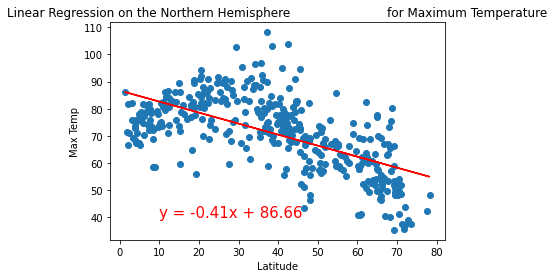

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

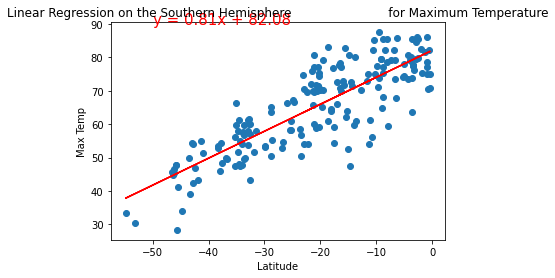

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

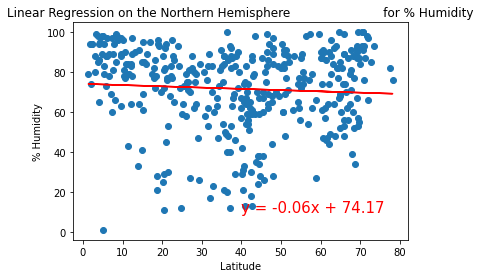

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Humidity', '% Humidity',(40,10))

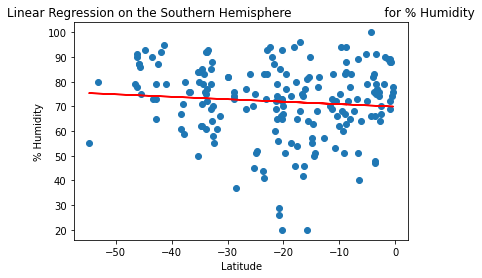

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Humidity', '% Humidity',(-50,15))

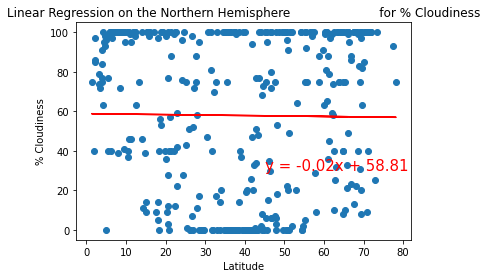

In [62]:
# Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#Call the function.
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Northern Hemisphere\
                       for % Cloudiness', '% Cloudiness', (45,30))

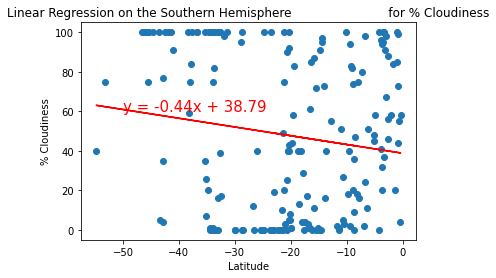

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

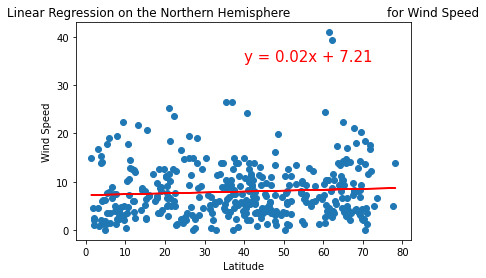

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

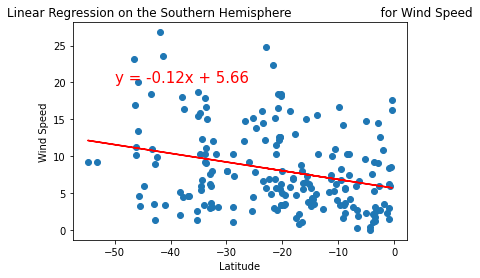

In [65]:
# Linear regression on the southern hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \
                      for Wind Speed", "Wind Speed", (-50,20))